## Lead Scoring Case Study ( Logistic Regression )


### Problem Statement :
X Education sells online courses to industry professionals.The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not.The typical lead conversion rate at X education is around 30%.

### Business Goal :
X Education needs help in selecting the most promising leads, i.e. the leads that are most likely to convert into paying customers.

The company needs a model wherein you a lead score is assigned to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%

## Import Libraries


In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn : advanced visualization
import seaborn as sns

pd.set_option('display.max_columns',None) # to display all the columns
pd.set_option('display.max_rows', None) # to display all the rows

# Superessing Warnings
import warnings 
warnings.filterwarnings('ignore')


## Data Sourcing

##### Read the data

In [2]:
# load the Leads-dataset
leads_df = pd.read_csv('Leads.csv')
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


##### Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [3]:
# let's check the dimentions of the dataframe
leads_df.shape

(9240, 37)

In [4]:
# let's look at the statistical aspects of the dataframe
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# let's see the type of each columns
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#checking duplicates
sum(leads_df.duplicated(subset = 'Prospect ID')) == 0


True

<font color=blue><b>Insight : </b> There are no duplicate values in the data.</font>

## Data Cleaning and Manipulation

In [7]:
# Checking the percentage wise missing/null value in the dataframe
percent_missing = round(leads_df.isnull().sum() * 100 / len(leads_df),2)
percent_missing

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
# Checking the count of 'Select' 
print(leads_df['How did you hear about X Education'].value_counts().head(3),'\n')
print(leads_df['Specialization'].value_counts().head(3),'\n')
print(leads_df['Lead Profile'].value_counts().head(3),'\n')
print(leads_df['City'].value_counts().head(3),'\n')

Select           5043
Online Search     808
Word Of Mouth     348
Name: How did you hear about X Education, dtype: int64 

Select                       1942
Finance Management            976
Human Resource Management     848
Name: Specialization, dtype: int64 

Select            4146
Potential Lead    1613
Other Leads        487
Name: Lead Profile, dtype: int64 

Mumbai               3222
Select               2249
Thane & Outskirts     752
Name: City, dtype: int64 



<font color=blue>As we can observe that there are **Select** values for many column.This is because customer did not select any option from the list, hence it shows select.
**Select** values are as good as **NULL**.</font>

In [9]:
# Converting 'Select' values to NaN.
leads_df = leads_df.replace('Select', np.nan)

In [10]:
#Checking the percentage wise missing / null value after modification on the dataframe.
percent_missing = round(leads_df.isnull().sum() * 100 / len(leads_df),2)
percent_missing

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
# We will drop the columns having more than 70% NA values.
#'How did you hear about X Education': The source from which the customer heard about X Education.
#'Lead Profile': A lead level assigned to each customer based on their profile.
leads_df.drop(['How did you hear about X Education','Lead Profile'], axis='columns', inplace=True)

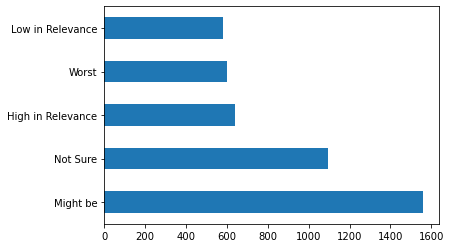

In [12]:
# Now we are dealing with the second highest percentage of missing value(~51%) which is the 'Lead Quality' column.
# 'Lead Quality': Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.
# Since this is an important column as EDA, this column has to be imputed instead of dropping.
leads_df['Lead Quality'].value_counts().plot(kind='barh')
plt.show()

In [13]:
# As Lead quality is based on the intution of employee, so if left blank we can impute 'Not Sure' in NaN safely.
leads_df['Lead Quality'] = leads_df['Lead Quality'].replace(np.nan, 'Not Sure')

This four columns have a 45.65% missing value.

1. Asymmetrique Activity Index
2. Asymmetrique Profile Index
3. Asymmetrique Activity Score
4. Asymmetrique Profile Score

**Description:** An index and score assigned to each customer based on their activity and their profile

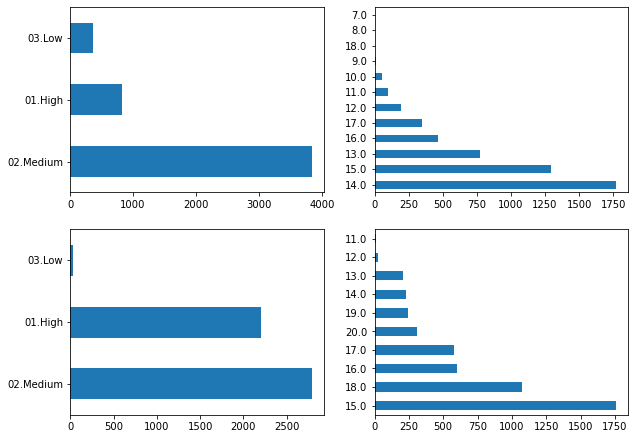

In [14]:
fig, axs = plt.subplots(2,2, figsize = (10,7.5))

leads_df['Asymmetrique Activity Index'].value_counts().plot(kind='barh',ax = axs[0,0])
leads_df['Asymmetrique Activity Score'].value_counts().plot(kind='barh',ax = axs[0,1])
leads_df['Asymmetrique Profile Index'].value_counts().plot(kind='barh',ax = axs[1,0])
leads_df['Asymmetrique Profile Score'].value_counts().plot(kind='barh',ax = axs[1,1])

plt.show()

<font color= blue>There are mainly two reasons for drop those columns:
1. According to inspection it is clear that data has too much variation in this parameters so it is not reliable to apply any value imputation in it.
2. Column has 45% null values.
3. And this column are generated or updated by the sales team once the member completed the call with students.
</font>

In [15]:
# drop a selected columns
drop_list = ['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score']
leads_df = leads_df.drop(drop_list,1)

##### Missing value imputation: 'City'

In [16]:
# Percentage count of data in 'City' column 
count = leads_df.City.value_counts().sum()
percentage = round(leads_df.City.value_counts()* 100 / count,2)
percentage

Mumbai                         57.84
Thane & Outskirts              13.50
Other Cities                   12.31
Other Cities of Maharashtra     8.20
Other Metro Cities              6.82
Tier II Cities                  1.33
Name: City, dtype: float64

In [17]:
# Around 58% of the data is Mumbai so we can impute Mumbai in the missing values.
leads_df['City'] = leads_df['City'].replace(np.nan, 'Mumbai')

##### Missing value imputation: 'Specialization'

The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.

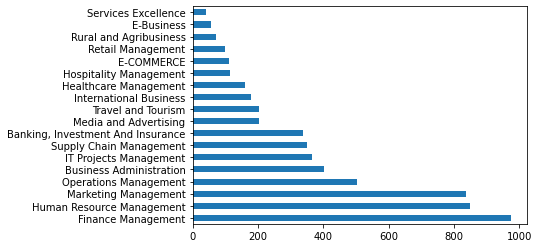

In [18]:
leads_df.Specialization.value_counts().plot(kind='barh')
plt.show()

In [19]:
# It maybe the case that lead has not entered any specialization if his/her option is not availabe on the list,
# May not have any specialization or is a student.
# Hence we can make a category "Others" for missing values. 
leads_df['Specialization'] = leads_df['Specialization'].replace(np.nan, 'Others')

In [20]:
# We see that specialization with Management in them have higher number of leads as well as leads converted. So this is definitely a significant variable.

# Clubbing Management Specializations because they show similar trends
leads_df['Specialization'] = leads_df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')

##### Missing value imputation:  ' What is your current occupation ',  and  ' What matters most to you in choosing a course '

Replacing the Missing value by most frequent/mode value.

In [21]:
print(leads_df['What is your current occupation'].describe(),'\n')
print('------------------------------------------------------')

print(leads_df['What matters most to you in choosing a course'].describe(),'\n')

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object 

------------------------------------------------------
count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object 



In [22]:
# Replacing missing value with column mode
leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan, 'Unemployed')
leads_df['What matters most to you in choosing a course'] = leads_df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects') 

##### Missing value imputation: ' Tags ' and  ' Country '

In [23]:
#Checking value counts of Tag variable
leads_df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [24]:
# Replacing Nan values with "Not Specified"
leads_df['Tags'] = leads_df['Tags'].replace(np.nan,'Not Specified')
# Clubbing Tags with low frequency with "Other Tags"
leads_df['Tags'] = leads_df['Tags'].replace(['In confusion whether part time or DLP', 'In touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

In [25]:
#Checking value counts of Country variable
leads_df['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

<font color = blue>As we can see the Number of Values for India are quite high (nearly 97% of the Data), we can drop this column.</font>

In [26]:
# droping 'Country'
leads_df.drop(['Country'],axis = 1,inplace = True)

In [27]:
# Rest missing values are under 2% so we can drop these rows.
#leads_df.dropna(inplace = True)
leads_df.dropna(subset=['Lead Source','TotalVisits','Page Views Per Visit','Last Activity'],inplace = True)

In [28]:
# Checking null
percent_missing = round(leads_df.isnull().sum() * 100 / len(leads_df),2)
percent_missing

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

#### Clubbing low frequency value

In [29]:
# Checking value counts of Lead Source column
leads_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
blog                    1
youtubechannel          1
WeLearn                 1
welearnblog_Home        1
NC_EDM                  1
Pay per Click Ads       1
testone                 1
Name: Lead Source, dtype: int64

In [30]:
# Replacing Multiple entry with same name Values and combining low frequency values
leads_df['Lead Source'] = leads_df['Lead Source'].replace('google','Google')
leads_df['Lead Source'] = leads_df['Lead Source'].replace('Facebook','Social Media')
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')

In [31]:
print('Number of rows after missing value imputation : ', leads_df.shape[0])
print('Number of columns after missing value imputation : ', leads_df.shape[1])

Number of rows after missing value imputation :  9074
Number of columns after missing value imputation :  30


#### Now Data is clean and we can start with the analysis part
## Exploratory Data Analytics

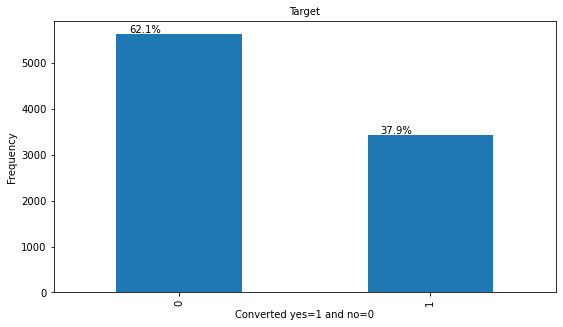

In [32]:
# Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
# Checking the imbalance percentage in TARGET Variable

plt.figure(figsize=[9,5])
ax = leads_df['Converted'].value_counts().plot(kind = 'bar')
plt.title('Target',fontsize = 10, color='black')
plt.xlabel('Converted yes=1 and no=0',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)

for p in ax.patches:
        ax.annotate('{:.1f}%'.format((p.get_height()*100)/float(len(leads_df))), (p.get_x()+0.05, p.get_height()+20))       
plt.show()

<font color= blue> <b>Insight: According to the graph out of 100
    - 62% lead has been successfully converted (1).
    - 38% is not converted (0).

#### Univariate and Bivariate Analysis

##### Continuous Variables

In case of continuous variables, we need to understand the central tendency and spread of the variable.These are measured using various statistical metrics visualization methods such as Boxplot,Histogram/Distribution Plot, Violin Plot etc.

##### Categorical Variables

For categorical variables, we’ll use frequency table to understand distribution of each category. It can be be measured using two metrics, Count and Count% against each category. Countplot or Bar chart can be used as visualization.

**Univariate analysis function will plot the graphs based on the parameter values.**

In [33]:
def univariate_analysis(df,col,vartype,fig_x,fig_y,rotation,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    fig_x & fig_y : figure size
    hue     : It's only applicable for categorical Bivariate analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(fig_x,fig_y))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[1],orient='h')
    
    if vartype == 1:
        if hue==None:
            #plt.figure(figsize=(7,5))
            fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(fig_x,fig_y))
            sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue)
        else:
            plt.figure(figsize=(fig_x,fig_y))
            plt.title(col+' Vs '+ 'Converted', fontsize = 14)
            ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue)
            for p in ax.patches:
                ax.annotate('{:.1f}%'.format((p.get_height()*100)/float(len(leads_df))), (p.get_x()+0.05, p.get_height()+20))
            plt.legend(loc='upper right')
            plt.xticks(rotation = rotation)
    
    plt.show()

#### Lead Origin

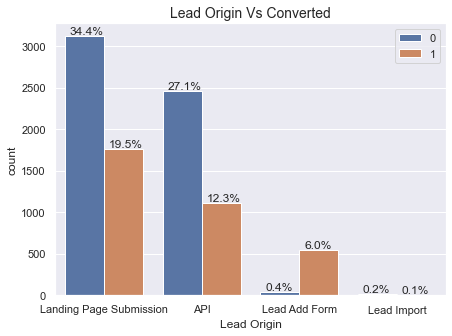

In [34]:
# Performing a univarite analysis to 'Lead Origin' Column
univariate_analysis(df=leads_df,col='Lead Origin', vartype=1, fig_x=7,fig_y=5, rotation=0, hue = 'Converted')

<font color= blue > <b>Insight:</b> To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.
</font>

#### Lead Source

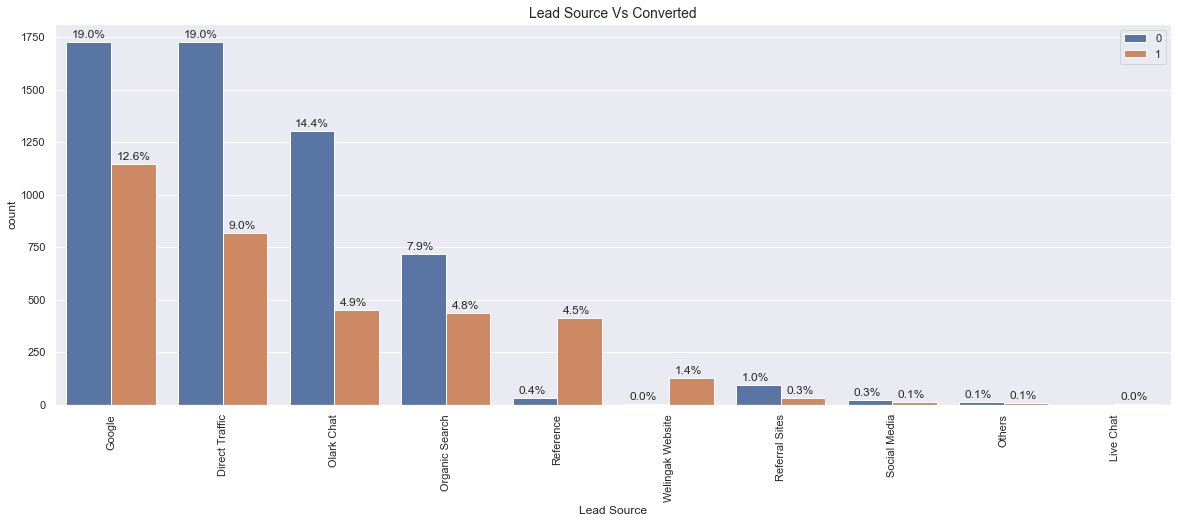

In [35]:
# Performing a univarite analysis to 'Lead Source' Column
univariate_analysis(df=leads_df,col='Lead Source',vartype=1,fig_x=20,fig_y=7,rotation=90, hue = 'Converted')


<font color= blue > <b>Insight:</b>
    Google and Direct traffic generates maximum number of leads.
    Percentage of Conversion Rate of reference leads and leads through Organic Search is high.
    To improve overall lead conversion rate, focus should be on improving lead converion of Direct Traffic and Organic Search and Reference.

</font>

#### Do Not Email

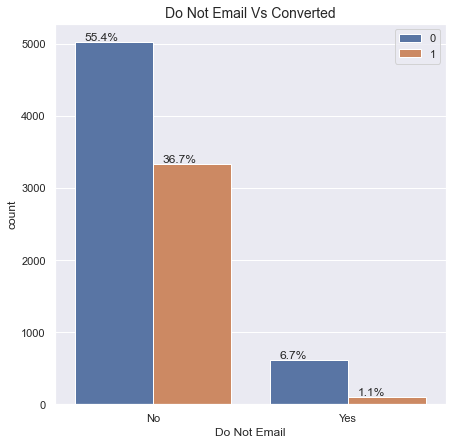

In [36]:
# Performing a univarite analysis to 'Do Not Email Column
univariate_analysis(df=leads_df,col='Do Not Email',vartype=1,fig_x=7,fig_y=7,rotation=0, hue = 'Converted')

<font color=blue><b>Insight:</b>Customers who have opted NO for course mail update, their conversion percentage from negative to  positive lead is high.</font>

#### Do Not Call

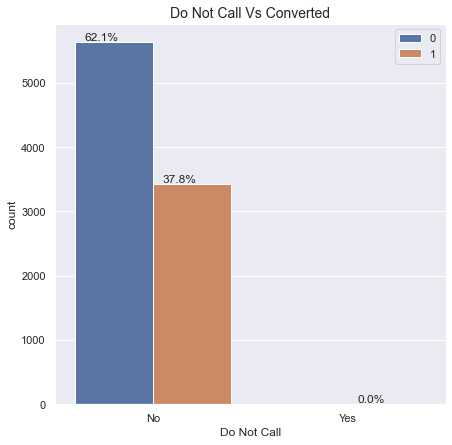

In [37]:
# Performing a univarite analysis to 'Do Not Call' Column
univariate_analysis(df=leads_df,col='Do Not Call',vartype=1,fig_x=7,fig_y=7,rotation=0, hue = 'Converted')

<font color=blue><b>Insight:</b>Customers who have opted NO for course whether of not they want to be called about the course or not, their conversion percentage from negative to  positive lead is high.</font>

#### TotalVisits

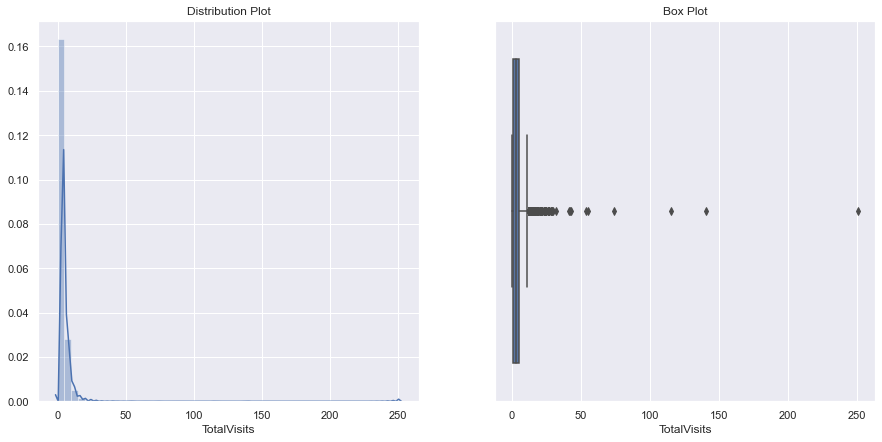

In [38]:
# Performing a univarite analysis to 'TotalVisits' Column
univariate_analysis(df=leads_df,col='TotalVisits',vartype=0,fig_x=15,fig_y=7, rotation=0)

<font color='blue'><b>Insight:</b>As we can see there are a number of outliers in the data.
</font>

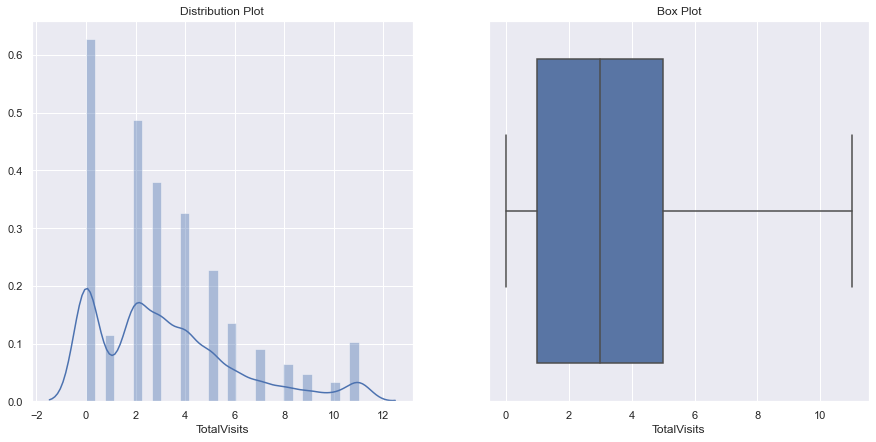

In [39]:
# We will cap the outliers to 97% value for analysis.
percentiles = leads_df['TotalVisits'].quantile([0.01,0.97]).values
leads_df['TotalVisits'][leads_df['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads_df['TotalVisits'][leads_df['TotalVisits'] >= percentiles[1]] = percentiles[1]
univariate_analysis(df=leads_df,col='TotalVisits',vartype=0,fig_x=15,fig_y=7,rotation=0)

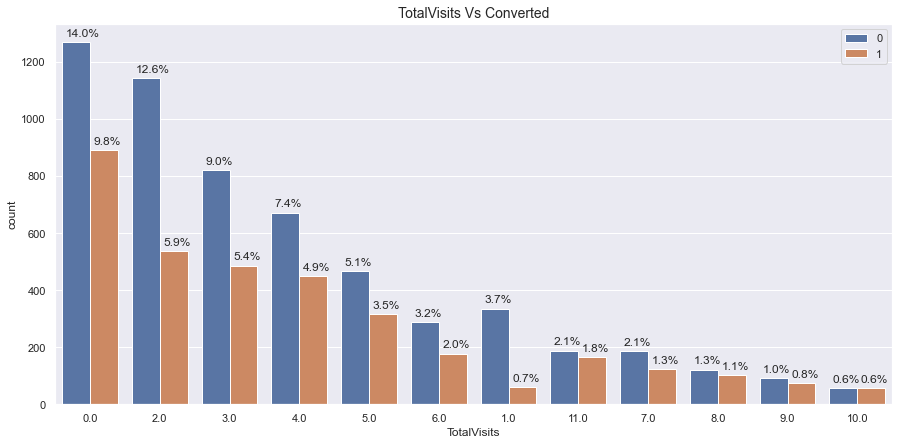

In [40]:
# Performing a univarite analysis to 'Do Not Call' Column
univariate_analysis(df=leads_df,col='TotalVisits',vartype=1,fig_x=15,fig_y=7,rotation=0, hue = 'Converted')

<font color='blue'><b>Insight:</b>As we can see that the chances of converting to positive leads are very high if the number of Visits increases..
</font>

#### Total Time Spent on Website

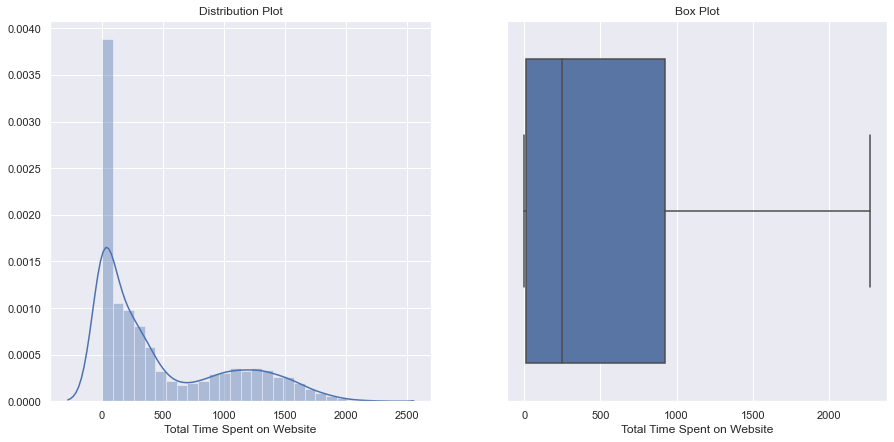

In [41]:
# Performing a univarite analysis to 'Total Time Spent on Website' Column
univariate_analysis(df=leads_df,col='Total Time Spent on Website',vartype=0,fig_x=15,fig_y=7,rotation=0)

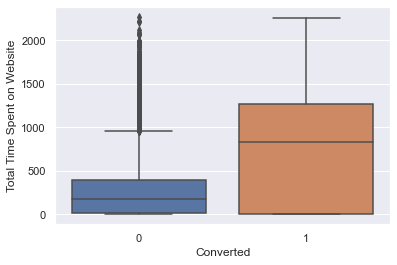

In [42]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_df)
plt.show()

<font color= blue><b>Insight:</b>Leads spending more time on the weblise are more likely to be converted.
Website should be made more engaging to make leads spend more time.</font>

#### Page Views Per Visit

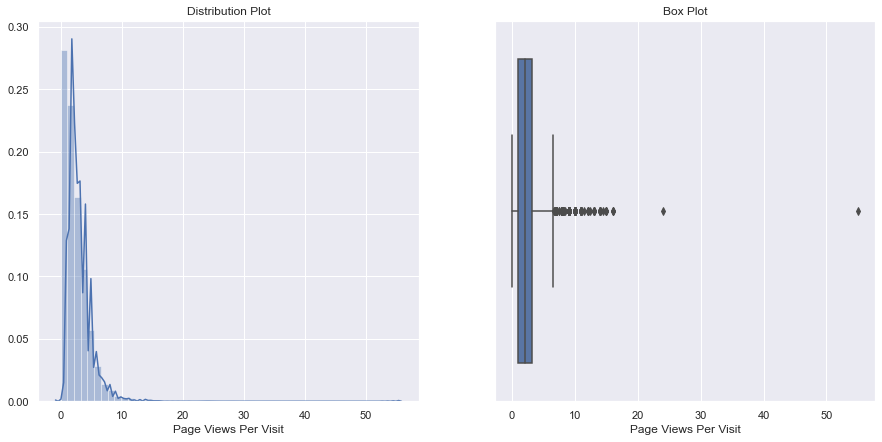

In [43]:
# Performing a univarite analysis to 'Page Views Per Visit' Column
univariate_analysis(df=leads_df,col='Page Views Per Visit',vartype=0,fig_x=15,fig_y=7, rotation=0)

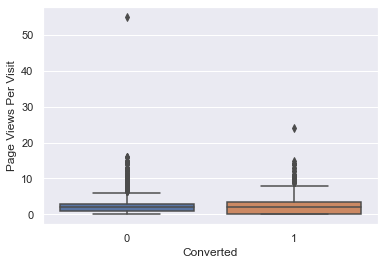

In [44]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_df)
plt.show()

<font color= blue><b>Insight:</b>Nothing can be said specifically for lead conversion from Page Views Per Visit </font>

#### Last Activity

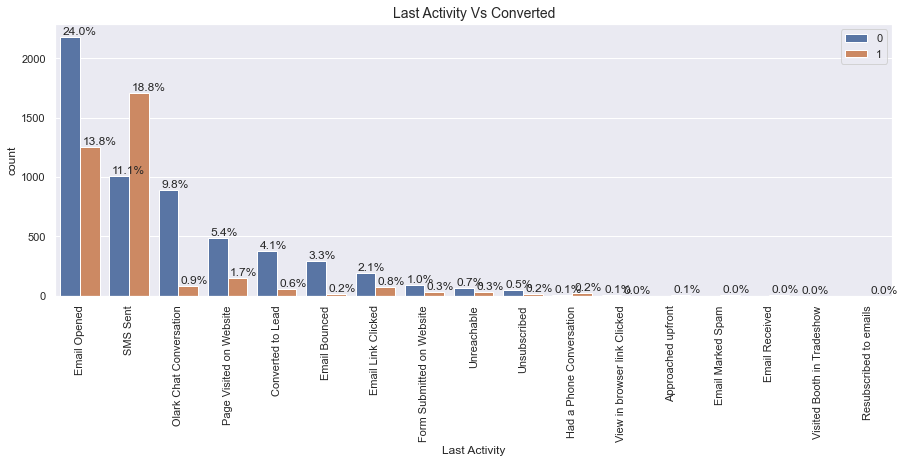

In [45]:
# Performing a univarite analysis to 'Last Activity' Column
univariate_analysis(df=leads_df,col='Last Activity',vartype=1,fig_x=15,fig_y=5,rotation=90, hue = 'Converted')

<font color= blue><b>Insight:</b>
Most leads have their email opened as their last activity and 15.8% of the leads have been successfully converted to positive leads.Conversion rate for leads with last activity as SMS Sent is 19.3%.
 </font>

#### Specialization

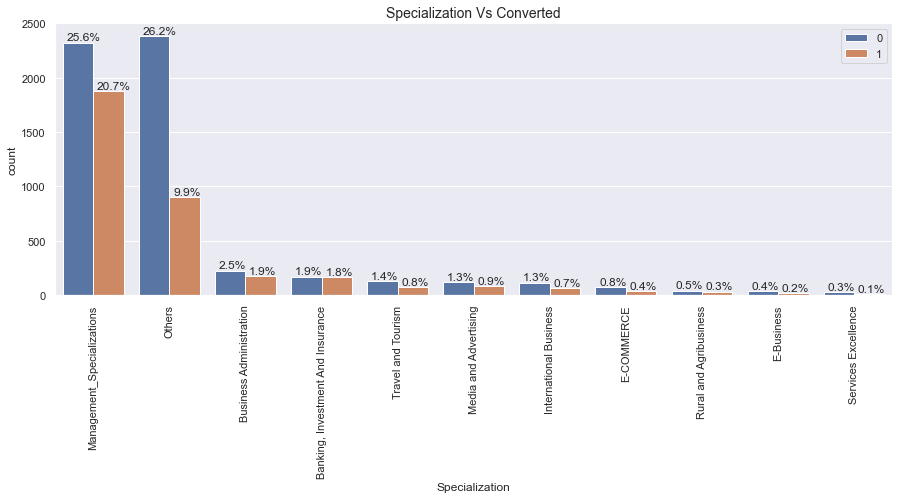

In [46]:
# Performing a univarite analysis to 'Specialization' Column
univariate_analysis(df=leads_df,col='Specialization',vartype=1,fig_x=15,fig_y=5,rotation=90, hue = 'Converted')

<font color= blue><b>Insight: </b>Focus should be more on the Specialization with high conversion rate.</font>

#### What is your current occupation

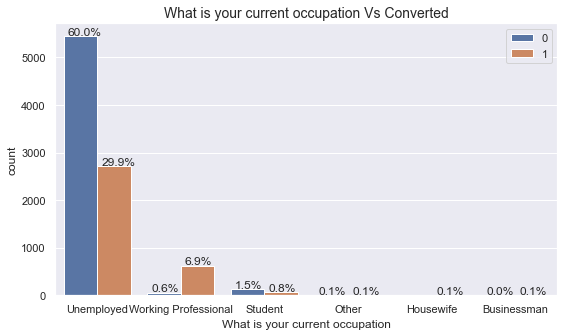

In [47]:
# Performing a univarite analysis to 'Current Occupation' Column
univariate_analysis(df=leads_df,col='What is your current occupation',vartype=1,fig_x=9,fig_y=5,rotation=0, hue = 'Converted')

<font color= blue><b>Insight:</b>
   - Unemployed leads are the most in numbers but has around 30% conversion rate.
   - Working Professionals going for the course have high chances of joining rate.
   - Student lead also have good conversion rate.

</font>

#### What matters most to you in choosing a course

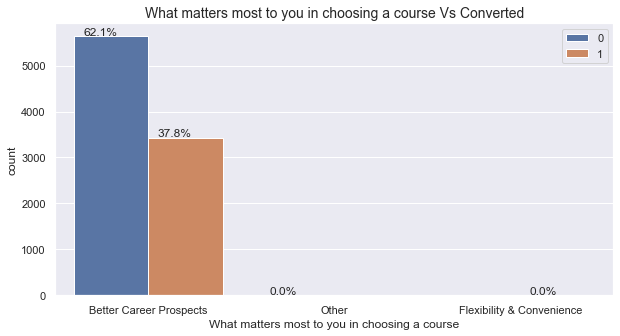

In [48]:
# Performing a univarite analysis to 'choosing a course' Column
univariate_analysis(df=leads_df,col='What matters most to you in choosing a course',vartype=1,fig_x=10,fig_y=5,rotation=0, hue = 'Converted')

<font color= blue><b>Insight:</b> Most entries are 'Better Career Prospects' and almost 38% converted as positive lead.Other then that no Inference can be drawn with this parameter.</font>

### subploting all the binary variables

####  Search,   Magazine,  Newspaper Article,  X Education Forums,  Newspaper,  Digital Advertisement

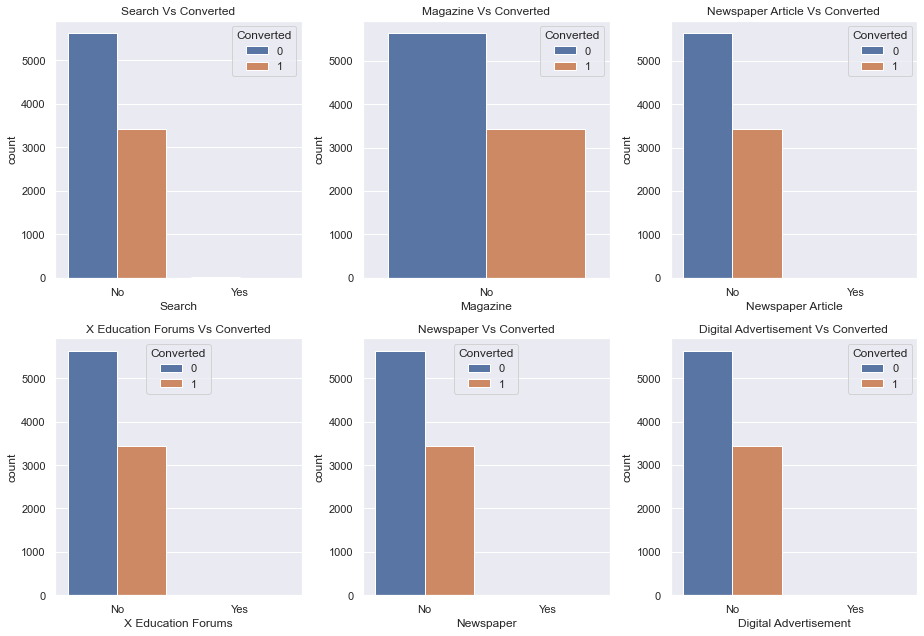

In [49]:
plt.figure(figsize=[13,9])
plt.subplot(2,3,1)

sns.countplot(data = leads_df, x= 'Search', order=leads_df['Search'].value_counts().index,hue = 'Converted')
plt.title('Search Vs Converted')

plt.subplot(2,3,2)
sns.countplot(data = leads_df, x= 'Magazine', order=leads_df['Magazine'].value_counts().index,hue = 'Converted')
plt.title('Magazine Vs Converted')

plt.subplot(2,3,3)
sns.countplot(data = leads_df, x= 'Newspaper Article', order=leads_df['Newspaper Article'].value_counts().index,hue = 'Converted')
plt.title('Newspaper Article Vs Converted')

plt.subplot(2,3,4)
sns.countplot(data = leads_df, x= 'X Education Forums', order=leads_df['X Education Forums'].value_counts().index,hue = 'Converted')
plt.title('X Education Forums Vs Converted')

plt.subplot(2,3,5)
sns.countplot(data = leads_df, x= 'Newspaper', order=leads_df['Newspaper'].value_counts().index,hue = 'Converted')
plt.title('Newspaper Vs Converted')

plt.subplot(2,3,6)
sns.countplot(data = leads_df, x= 'Digital Advertisement', order=leads_df['Digital Advertisement'].value_counts().index,hue = 'Converted')
plt.title('Digital Advertisement Vs Converted')

plt.tight_layout()
plt.show()

<font color= blue><b>Insight:</b> Most entries are 'No'. No Inference can be drawn with this parameter.</font>

####  Recommendations,  Receive Updates Courses,  Update on Supply Chain Content,  updates on DM Content,  Pay through cheque,  A free copy of Mastering The Interview

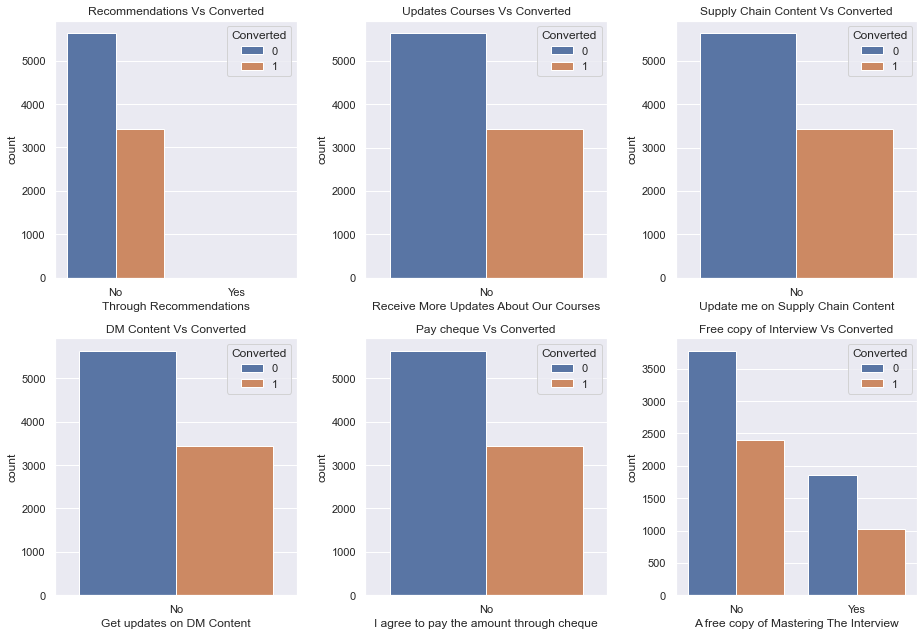

In [50]:
plt.figure(figsize=[13,9])
plt.subplot(2,3,1)

sns.countplot(data = leads_df, x= 'Through Recommendations', order=leads_df['Through Recommendations'].value_counts().index,hue = 'Converted')
plt.title('Recommendations Vs Converted')

plt.subplot(2,3,2)
sns.countplot(data = leads_df, x= 'Receive More Updates About Our Courses', order=leads_df['Receive More Updates About Our Courses'].value_counts().index,hue = 'Converted')
plt.title('Updates Courses Vs Converted')

plt.subplot(2,3,3)
sns.countplot(data = leads_df, x= 'Update me on Supply Chain Content', order=leads_df['Update me on Supply Chain Content'].value_counts().index,hue = 'Converted')
plt.title('Supply Chain Content Vs Converted')

plt.subplot(2,3,4)
sns.countplot(data = leads_df, x= 'Get updates on DM Content', order=leads_df['Get updates on DM Content'].value_counts().index,hue = 'Converted')
plt.title('DM Content Vs Converted')

plt.subplot(2,3,5)
sns.countplot(data = leads_df, x= 'I agree to pay the amount through cheque', order=leads_df['I agree to pay the amount through cheque'].value_counts().index,hue = 'Converted')
plt.title('Pay cheque Vs Converted')

plt.subplot(2,3,6)
sns.countplot(data = leads_df, x= 'A free copy of Mastering The Interview', order=leads_df['A free copy of Mastering The Interview'].value_counts().index,hue = 'Converted')
plt.title('Free copy of Interview Vs Converted')

plt.tight_layout()
plt.show()

<font color= blue><b>Insight:</b>
- `A free copy of Mastering The Interview`In this column Conversion rate is high on leads who do not want a free copy of Mastering Interviews.
- Other then **A free copy of Mastering The Interview** Most of the entries are 'No'. No Inference can be drawn with this parameter.</font>

#### Tags

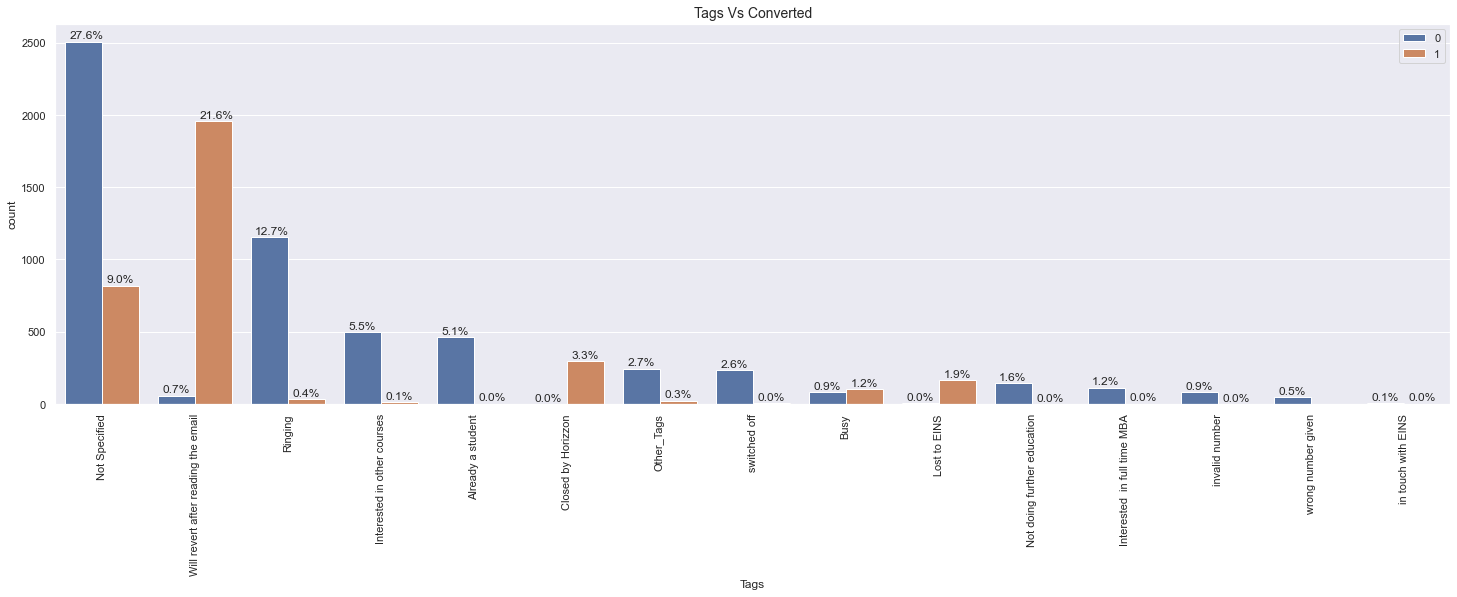

In [51]:
# Performing a univarite analysis to 'Tags' Column
univariate_analysis(df=leads_df,col='Tags',vartype=1,fig_x=25,fig_y=7,rotation=90, hue = 'Converted')

<font color= blue><b>Insight:</b>
It can be noticed that the conversion rate is high for **Will revert after reading the email**
</font>

#### Lead Quality

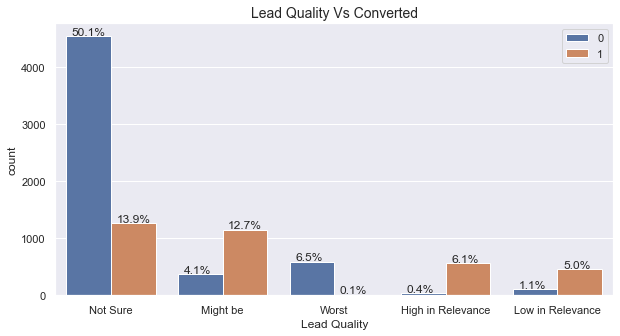

In [52]:
# Performing a univarite analysis to 'Lead Quality' Column
univariate_analysis(df=leads_df,col='Lead Quality',vartype=1,fig_x=10,fig_y=5,rotation=0, hue = 'Converted')

<font color= blue><b>Insight:</b>
It can be noticed that the conversion rate is very low for **Not Sure** and No lead from **Worst**.</font>

#### City

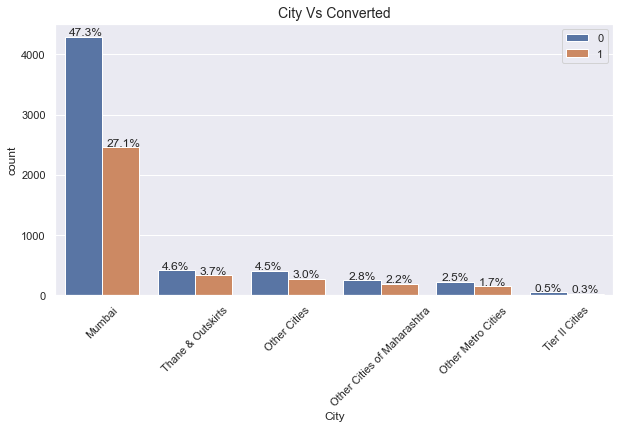

In [53]:
# Performing a univarite analysis to 'City' Column
univariate_analysis(df=leads_df,col='City',vartype=1,fig_x=10,fig_y=5,rotation=45, hue = 'Converted')

<font color= blue><b>Insight:</b> Most leads are from mumbai with 27% conversion rate. </font>

#### Last Notable Activity

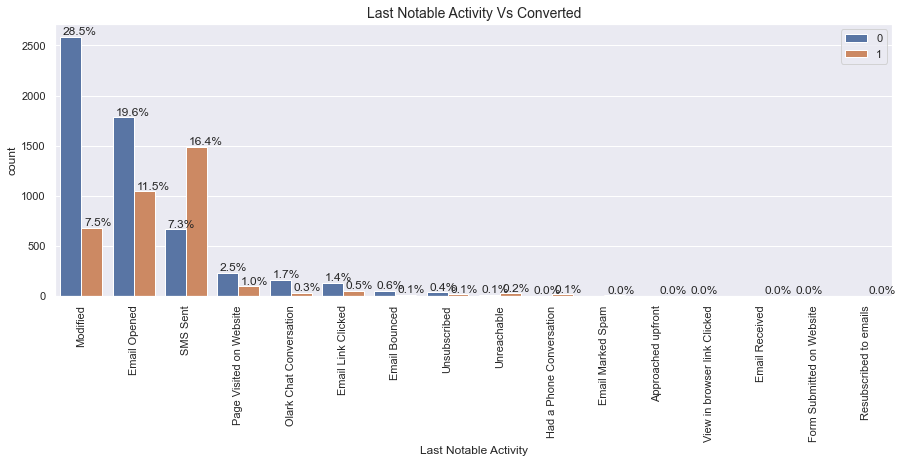

In [54]:
# Performing a univarite analysis to 'Last Notable Activity' Column
univariate_analysis(df=leads_df,col='Last Notable Activity',vartype=1,fig_x=15,fig_y=5,rotation=90, hue = 'Converted')

<font color= blue><b>Insight:</b> It can be noticed that the conversion rate is Significantly high for "SMS Sent" </font>

### Conclusion After Exploratory Data Analysis: 

<font color= blue>
    
- Based on the univariate analysis we have seen that many columns are not going to add any information to the model, and for further analysis we can drop this columns.
    
- Remove columns which are generated or updated by the sales team once the member completed the call with students. This columns are not relevent for model because this not a system generated colunms.
 </font>

In [55]:
# Removing following columns from the leads_df dataframe
drop_list = ['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque']
leads_df = leads_df.drop(drop_list, axis=1)

In [56]:
#  Removing following columns which are generated or updated by the sales team once the member completed the call with students.
sales_team_gen = ['Last Activity', 'Tags', 'Lead Quality', 'Last Notable Activity']
leads_df = leads_df.drop(sales_team_gen, axis=1)

In [57]:
leads_df.shape

(9074, 13)

In [58]:
leads_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Others,Unemployed,Mumbai,No
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Others,Unemployed,Mumbai,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Business Administration,Student,Mumbai,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,No
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Others,Unemployed,Mumbai,No


## Data Preparation

##### Converting categorical binary variables (Yes/No) to 1/0.

In [59]:
# List of Variables to map
varlist = ['Do Not Email', 'Do Not Call', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

# Applying the function to the housing list
leads_df[varlist] = leads_df[varlist].apply(binary_map)

<font color= blue>Now that you have the master dataframe in place, and we have also performed a binary mapping for few of the categorical variables, the next step would be to create dummy variables for features with multiple levels.</font>

#### For Categorical variables with multiple levels, creating dummy features (one-hot encode)

In [60]:
# Creating a dummy variable for selected categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads_df[['Lead Origin', 'Lead Source', 'Specialization','What is your current occupation','City']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [61]:
# Adding the dummy1 to the master dataframe
leads_df = pd.concat([leads_df, dummy1], axis=1)
leads_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Others,Unemployed,Mumbai,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Others,Unemployed,Mumbai,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Business Administration,Student,Mumbai,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Others,Unemployed,Mumbai,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


#### Droping the repeated variables

In [62]:
# We have created dummies for the below variables, so we can drop them
leads_df = leads_df.drop(['Lead Origin', 'Lead Source', 'Specialization','What is your current occupation','City'], axis = 1)

In [63]:
# check shape of the data frame
leads_df.shape

(9074, 40)

<font color = blue>Since there are around 40 columns, we will not be looking at the correlation using heat map as we will not be able to infer anything from the heat map due to huge data.</font>

## Test-Train Split

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
# Putting feature variable to X
X = leads_df.drop(['Converted','Prospect ID'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [66]:
# Putting response variable to y
y = leads_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [67]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3009,0,0,-0.431325,-0.160255,-0.179666,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1012,1,0,-0.431325,-0.540048,-0.179666,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
9226,0,0,-1.124566,-0.888650,-1.132538,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4750,0,0,-0.431325,1.643304,-0.179666,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
7987,0,0,0.608537,2.017593,0.058552,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [70]:
### Checking the Lead Convertion Rate
Convertion_rate = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
Convertion_rate

37.85541106458012

<font color=blue>We have almost 38% conversion</font>

## Model Building (Model-I)

In [71]:
import statsmodels.api as sm

In [72]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6312
Model Family:                Binomial   Df Model:                           38
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2916.0
Date:                Mon, 07 Dec 2020   Deviance:                       5831.9
Time:                        19:50:41   Pearson chi2:                 6.86e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6344      1.070      0.593      0.553      -1.463       2.732
Do Not Email                                            -1.4238      0.165     -8.606      0.000      -1.748      -1.100
Do Not Call                                             20.0612   3.36e+04      0.001      1.000   -6.58e+04    6.58e+04
TotalVisits                                              0.2090      0.050      4.187      0.000       0.111       0.307
Total Time Spent on Website                              1.1121      0.039     28.860      0.000       1.037       1.188
Page Views Per Visit                                    -0.1099      0.052     -2.111      0.035      -0.212      -0.008
A free copy of Mastering The Interview                  -0.1810      0.103     -1.762      0.078      -0.382       0.020
Lead Origin_Landing Page Submission                     -0.7968      0.128     -6.230      0.000      -1.048      -0.546
Lead Origin_Lead Add Form                                0.5623      1.143      0.492      0.623      -1.679       2.803
Lead Origin_Lead Import                                  0.7618      1.562      0.488      0.626      -2.301       3.824
Lead Source_Google                                       0.2279      0.107      2.126      0.034       0.018       0.438
Lead Source_Live Chat                                   24.5694   3.41e+04      0.001      0.999   -6.68e+04    6.68e+04
Lead Source_Olark Chat                                   1.1658      0.150      7.757      0.000       0.871       1.460
Lead Source_Organic Search                               0.1615      0.123      1.317      0.188      -0.079       0.402
Lead Source_Others                                       0.2483      0.731      0.340      0.734      -1.185       1.682
Lead Source_Reference                                    3.4768      1.166      2.983      0.003       1.192       5.761
Lead Source_Referral Sites                              -0.3481      0.336     -1.035      0.301      -1.007       0.311
Lead Source_Social Media                                 0.3463      1.492      0.232      0.816      -2.577       3.270
Lead Source_Welingak Website                             6.0226      1.355      4.446      0.000       3.367       8.678
Specialization_Business Administration                  -0.3377      0.231     -1.463      0.144      -0.790       0.115
Specialization_E-Business                               -0.0489      0.433     -0.113      0.910      -0.898       0.800
Specialization_E-COMMERCE                                0.0370      0.335      0.110      0.912      -0.620       0.694
Specialization_International Business                   -0

In [73]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Lead Origin_Lead Add Form,101.88
14,Lead Source_Reference,77.89
31,What is your current occupation_Unemployed,42.30
17,Lead Source_Welingak Website,24.72
24,Specialization_Others,14.02
22,Specialization_Management_Specializations,13.47
16,Lead Source_Social Media,9.08
8,Lead Origin_Lead Import,9.08
6,Lead Origin_Landing Page Submission,8.32
32,What is your current occupation_Working Profes...,4.29


<font color= blue><b>Insight: </b> 
   - From the above model-I summry it is clear that there are many variables whose p-values very high, implying that that variable is statistically insignificant. So we need to eliminate some of the variables in order to build a better model.

   - We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).
</font>

## Feature Selection Using RFE

In [74]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [75]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [76]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 16),
 ('TotalVisits', False, 15),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 21),
 ('A free copy of Mastering The Interview', False, 7),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Live Chat', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 20),
 ('Lead Source_Others', False, 4),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_Social Media', False, 5),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 12),
 ('Specialization_E-Business', False, 24),
 ('Specialization_E-COMMERCE', False, 19),
 ('Specialization_International Business', False, 11),
 ('Specialization_Management_Specializations', False, 13),
 ('Specialization_Media and Advertis

In [77]:
# All selected variable by RFE
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities'],
      dtype='object')

In [78]:
# not selected variable by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Other', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts'],
      dtype='object')

#### Assessing the model with StatsModels

### (Model-II)

In [79]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2938.6
Date:                Mon, 07 Dec 2020   Deviance:                       5877.1
Time:                        19:50:46   Pearson chi2:                 6.87e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3876      0.607      0.638      0.523      -0.802       1.578
Do Not Email                                            -1.4819      0.163     -9.068      0.000      -1.802      -1.162
Total Time Spent on Website                              1.1120      0.038     29.100      0.000       1.037       1.187
Lead Origin_Landing Page Submission                     -0.9480      0.121     -7.826      0.000      -1.185      -0.711
Lead Origin_Lead Add Form                                0.4911      1.029      0.477      0.633      -1.526       2.509
Lead Origin_Lead Import                                  0.8582      0.476      1.804      0.071      -0.074       1.791
Lead Source_Live Chat                                   24.3359   3.41e+04      0.001      0.999   -6.68e+04    6.68e+04
Lead Source_Olark Chat                                   0.8721      0.112      7.783      0.000       0.652       1.092
Lead Source_Reference                                    3.2378      1.052      3.079      0.002       1.177       5.299
Lead Source_Welingak Website                             5.8071      1.258      4.615      0.000       3.341       8.273
Specialization_Others                                   -1.2015      0.117    -10.244      0.000      -1.431      -0.972
What is your current occupation_Housewife               22.0007   1.51e+04      0.001      0.999   -2.96e+04    2.96e+04
What is your current occupation_Student                 -0.2382      0.638     -0.373      0.709      -1.489       1.013
What is your current occupation_Unemployed              -0.4589      0.604     -0.760      0.447      -1.642       0.724
What is your current occupation_Working Professional     2.1972      0.629      3.491      0.000       0.964       3.431
City_Tier II Cities                                     -0.6365      0.417     -1.527      0.127      -1.454       0.181
========================================================================================================================
"""

<font color= blue>from above Model-II `Lead Source_Live Chat` has a very high p-value so that variable is statistically insignificant. So we need to eliminate this variables in order to build a better model</font> 


In [80]:
# eliminating column
col1 = col.drop('Lead Source_Live Chat',1)

### Model-III

In [81]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2941.2
Date:                Mon, 07 Dec 2020   Deviance:                       5882.4
Time:                        19:50:47   Pearson chi2:                 6.86e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3813      0.607      0.629      0.530      -0.808       1.570
Do Not Email                                            -1.4815      0.163     -9.069      0.000      -1.802      -1.161
Total Time Spent on Website                              1.1109      0.038     29.072      0.000       1.036       1.186
Lead Origin_Landing Page Submission                     -0.9380      0.121     -7.755      0.000      -1.175      -0.701
Lead Origin_Lead Add Form                                1.9192      0.951      2.018      0.044       0.055       3.783
Lead Origin_Lead Import                                  0.8611      0.475      1.812      0.070      -0.071       1.793
Lead Source_Olark Chat                                   0.8659      0.112      7.730      0.000       0.646       1.085
Lead Source_Reference                                    1.8089      0.973      1.858      0.063      -0.099       3.717
Lead Source_Welingak Website                             4.3725      1.192      3.668      0.000       2.036       6.709
Specialization_Others                                   -1.1861      0.117    -10.140      0.000      -1.415      -0.957
What is your current occupation_Housewife               21.9977   1.51e+04      0.001      0.999   -2.96e+04    2.96e+04
What is your current occupation_Student                 -0.2416      0.638     -0.379      0.705      -1.492       1.008
What is your current occupation_Unemployed              -0.4623      0.603     -0.767      0.443      -1.644       0.720
What is your current occupation_Working Professional     2.1945      0.629      3.490      0.000       0.962       3.427
City_Tier II Cities                                     -0.6360      0.417     -1.526      0.127      -1.453       0.181
========================================================================================================================
"""

<font color= blue>from above Model-III `What is your current occupation_Housewife` has a very high p-value so that variable is statistically insignificant. So we need to eliminate this variables in order to build a better model</font> 


In [82]:
# eliminating column
col2 = col1.drop('What is your current occupation_Housewife',1)

### Model-IV

In [83]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2943.5
Date:                Mon, 07 Dec 2020   Deviance:                       5887.0
Time:                        19:50:47   Pearson chi2:                 6.87e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8689      0.567      1.532      0.125      -0.242       1.980
Do Not Email                                            -1.4846      0.163     -9.081      0.000      -1.805      -1.164
Total Time Spent on Website                              1.1097      0.038     29.062      0.000       1.035       1.185
Lead Origin_Landing Page Submission                     -0.9326      0.121     -7.717      0.000      -1.169      -0.696
Lead Origin_Lead Add Form                                1.9210      0.951      2.020      0.043       0.057       3.785
Lead Origin_Lead Import                                  0.8629      0.475      1.816      0.069      -0.069       1.794
Lead Source_Olark Chat                                   0.8662      0.112      7.733      0.000       0.647       1.086
Lead Source_Reference                                    1.8116      0.973      1.861      0.063      -0.096       3.719
Lead Source_Welingak Website                             4.3720      1.192      3.668      0.000       2.036       6.708
Specialization_Others                                   -1.1837      0.117    -10.127      0.000      -1.413      -0.955
What is your current occupation_Student                 -0.7332      0.599     -1.224      0.221      -1.907       0.440
What is your current occupation_Unemployed              -0.9537      0.562     -1.697      0.090      -2.055       0.148
What is your current occupation_Working Professional     1.7026      0.589      2.889      0.004       0.548       2.858
City_Tier II Cities                                     -0.6364      0.417     -1.527      0.127      -1.453       0.180
========================================================================================================================
"""

<font color= blue>from above Model-IV `What is your current occupation_Student` has a very high p-value so that variable is statistically insignificant. So we need to eliminate this variables in order to build a better model</font> 


In [84]:
# eliminating column
col3 = col2.drop('What is your current occupation_Student',1)

### Model-V

In [85]:
X_train_sm = sm.add_constant(X_train[col3])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2944.3
Date:                Mon, 07 Dec 2020   Deviance:                       5888.6
Time:                        19:50:47   Pearson chi2:                 6.87e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2369      0.222      1.066      0.286      -0.199       0.673
Do Not Email                                            -1.4833      0.163     -9.085      0.000      -1.803      -1.163
Total Time Spent on Website                              1.1104      0.038     29.087      0.000       1.036       1.185
Lead Origin_Landing Page Submission                     -0.9405      0.121     -7.794      0.000      -1.177      -0.704
Lead Origin_Lead Add Form                                1.9177      0.951      2.016      0.044       0.053       3.782
Lead Origin_Lead Import                                  0.8588      0.475      1.806      0.071      -0.073       1.791
Lead Source_Olark Chat                                   0.8630      0.112      7.708      0.000       0.644       1.082
Lead Source_Reference                                    1.8146      0.974      1.864      0.062      -0.094       3.723
Lead Source_Welingak Website                             4.3742      1.192      3.669      0.000       2.037       6.711
Specialization_Others                                   -1.1904      0.117    -10.195      0.000      -1.419      -0.962
What is your current occupation_Unemployed              -0.3143      0.196     -1.606      0.108      -0.698       0.069
What is your current occupation_Working Professional     2.3417      0.265      8.843      0.000       1.823       2.861
City_Tier II Cities                                     -0.6365      0.417     -1.527      0.127      -1.453       0.180
========================================================================================================================
"""

In [86]:
# eliminating column 'City_Tier II Cities'
col4 = col3.drop('City_Tier II Cities',1)

### Model-VI

In [87]:
X_train_sm = sm.add_constant(X_train[col4])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2945.5
Date:                Mon, 07 Dec 2020   Deviance:                       5891.1
Time:                        19:50:48   Pearson chi2:                 6.87e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2414      0.222      1.086      0.277      -0.194       0.677
Do Not Email                                            -1.4943      0.163     -9.159      0.000      -1.814      -1.175
Total Time Spent on Website                              1.1098      0.038     29.091      0.000       1.035       1.185
Lead Origin_Landing Page Submission                     -0.9472      0.121     -7.855      0.000      -1.184      -0.711
Lead Origin_Lead Add Form                                1.9170      0.951      2.015      0.044       0.053       3.781
Lead Origin_Lead Import                                  0.8580      0.475      1.805      0.071      -0.074       1.790
Lead Source_Olark Chat                                   0.8620      0.112      7.701      0.000       0.643       1.081
Lead Source_Reference                                    1.8151      0.974      1.864      0.062      -0.093       3.723
Lead Source_Welingak Website                             4.3767      1.192      3.671      0.000       2.040       6.713
Specialization_Others                                   -1.1898      0.117    -10.188      0.000      -1.419      -0.961
What is your current occupation_Unemployed              -0.3188      0.196     -1.630      0.103      -0.702       0.065
What is your current occupation_Working Professional     2.3343      0.265      8.818      0.000       1.815       2.853
========================================================================================================================
"""

In [88]:
# eliminating column 'What is your current occupation_Unemployed'
col5 = col4.drop('What is your current occupation_Unemployed',1)

### Model-VII (Final Model)

In [89]:
X_train_sm = sm.add_constant(X_train[col5])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2946.8
Date:                Mon, 07 Dec 2020   Deviance:                       5893.7
Time:                        19:50:48   Pearson chi2:                 6.88e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0672      0.116     -0.580      0.562      -0.294       0.160
Do Not Email                                            -1.4943      0.163     -9.159      0.000      -1.814      -1.175
Total Time Spent on Website                              1.1099      0.038     29.097      0.000       1.035       1.185
Lead Origin_Landing Page Submission                     -0.9480      0.121     -7.856      0.000      -1.184      -0.711
Lead Origin_Lead Add Form                                1.9083      0.952      2.005      0.045       0.043       3.773
Lead Origin_Lead Import                                  0.8497      0.475      1.787      0.074      -0.082       1.781
Lead Source_Olark Chat                                   0.8654      0.112      7.731      0.000       0.646       1.085
Lead Source_Reference                                    1.8263      0.974      1.875      0.061      -0.082       3.735
Lead Source_Welingak Website                             4.3816      1.193      3.674      0.000       2.044       6.719
Specialization_Others                                   -1.1937      0.117    -10.211      0.000      -1.423      -0.965
What is your current occupation_Working Professional     2.6436      0.185     14.309      0.000       2.282       3.006
========================================================================================================================
"""

In [90]:
# eliminating column 'Lead Origin_Lead Import'
col6 = col5.drop('Lead Origin_Lead Import',1)

### Model-VIII

In [91]:
X_train_sm = sm.add_constant(X_train[col6])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2948.3
Date:                Mon, 07 Dec 2020   Deviance:                       5896.6
Time:                        19:50:48   Pearson chi2:                 6.89e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0329      0.114     -0.287      0.774      -0.257       0.191
Do Not Email                                            -1.4959      0.163     -9.173      0.000      -1.816      -1.176
Total Time Spent on Website                              1.1037      0.038     29.106      0.000       1.029       1.178
Lead Origin_Landing Page Submission                     -0.9792      0.120     -8.190      0.000      -1.214      -0.745
Lead Origin_Lead Add Form                                1.8816      0.952      1.977      0.048       0.016       3.747
Lead Source_Olark Chat                                   0.8432      0.111      7.592      0.000       0.626       1.061
Lead Source_Reference                                    1.8257      0.974      1.874      0.061      -0.084       3.735
Lead Source_Welingak Website                             4.3887      1.193      3.679      0.000       2.051       6.727
Specialization_Others                                   -1.2138      0.117    -10.403      0.000      -1.443      -0.985
What is your current occupation_Working Professional     2.6437      0.185     14.310      0.000       2.282       3.006
========================================================================================================================
"""

In [92]:
# eliminating column 
col7 = col6.drop('Lead Source_Reference',1)

### Model-IX

In [93]:
X_train_sm = sm.add_constant(X_train[col7])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6342
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2949.8
Date:                Mon, 07 Dec 2020   Deviance:                       5899.5
Time:                        19:50:48   Pearson chi2:                 6.86e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0331      0.114     -0.290      0.772      -0.257       0.191
Do Not Email                                            -1.4922      0.163     -9.163      0.000      -1.811      -1.173
Total Time Spent on Website                              1.1032      0.038     29.092      0.000       1.029       1.178
Lead Origin_Landing Page Submission                     -0.9791      0.120     -8.192      0.000      -1.213      -0.745
Lead Origin_Lead Add Form                                3.6380      0.230     15.789      0.000       3.186       4.090
Lead Source_Olark Chat                                   0.8412      0.111      7.569      0.000       0.623       1.059
Lead Source_Welingak Website                             2.6299      0.752      3.497      0.000       1.156       4.104
Specialization_Others                                   -1.2126      0.117    -10.399      0.000      -1.441      -0.984
What is your current occupation_Working Professional     2.6449      0.185     14.323      0.000       2.283       3.007
========================================================================================================================
"""

## Checking VIFs

In [94]:
# Check for the VIF values of the feature variables. 
#from statsmodels.stats.outliers_influence import variance_inflation_factor

In [95]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col7].columns
vif['VIF'] = [variance_inflation_factor(X_train[col7].values, i) for i in range(X_train[col7].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_Olark Chat,1.86
6,Specialization_Others,1.79
3,Lead Origin_Lead Add Form,1.52
5,Lead Source_Welingak Website,1.36
1,Total Time Spent on Website,1.26
2,Lead Origin_Landing Page Submission,1.17
7,What is your current occupation_Working Profes...,1.17
0,Do Not Email,1.11


<font color= blue>All variables have a good value of VIF. So we need to not drop any more variables and we can proceed with making predictions using this model only.</font>

In [96]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.233441
1012    0.158718
9226    0.200220
4750    0.690140
7987    0.770954
1281    0.499801
2880    0.120842
4971    0.887683
7536    0.881971
1248    0.738387
dtype: float64

In [97]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.23344095, 0.15871846, 0.20022036, 0.69014016, 0.77095384,
       0.49980102, 0.12084201, 0.88768342, 0.88197083, 0.7383871 ])

#### Creating a dataframe with the actual converted flag and the predicted probabilities

In [98]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.233441,3009
1,0,0.158718,1012
2,0,0.200220,9226
3,1,0.690140,4750
4,1,0.770954,7987


In [99]:
#Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.233441,3009,0
1,0,0.158718,1012,0
2,0,0.200220,9226,0
3,1,0.690140,4750,1
4,1,0.770954,7987,1


## Checking the confusion metrics and accuracy

In [100]:
from sklearn import metrics

In [101]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3429  476]
 [ 887 1559]]


In [102]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7853881278538812


<font color= blue>Accuracy rate is around 79% which is good. However we also need to calculate the other metrics as we cannot depend only 
on the accuracy metrics. </font>

In [103]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [104]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6373671300081766

In [105]:
# Let us calculate specificity
TN / float(TN+FP)

0.8781049935979514

In [106]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
print(FP/ float(TN+FP))

0.12189500640204866


In [107]:
# positive predictive value 
print (TP / float(TP+FP))

0.7660933660933661


In [108]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7944856348470807


## Plotting the ROC Curve

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

In [109]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(7, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [110]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
drop_intermediate = False )

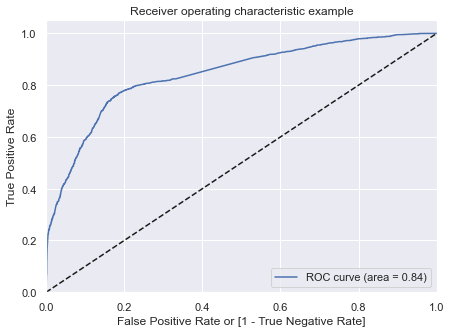

In [111]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

<font color=blue>Area under The ROC curve is high resulting it with best model.</font>

### Finding the Optimal Threshold /Cutoff

In the last segment, you saw that the ROC curve essentially shows you a trade-off between the sensitivity and specificity.
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [112]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.233441,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.158718,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.200220,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.690140,4750,1,1,1,1,1,1,1,1,0,0,0
4,1,0.770954,7987,1,1,1,1,1,1,1,1,1,0,0


In [113]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.449693  0.992232  0.109859
0.2   0.2  0.640372  0.904742  0.474776
0.3   0.3  0.793891  0.774325  0.806146
0.4   0.4  0.800504  0.727719  0.846095
0.5   0.5  0.785388  0.637367  0.878105
0.6   0.6  0.773422  0.548242  0.914469
0.7   0.7  0.750905  0.441128  0.944942
0.8   0.8  0.729019  0.338921  0.973367
0.9   0.9  0.704456  0.246525  0.991293


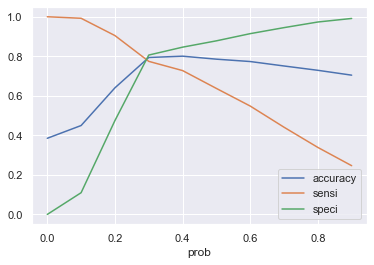

In [114]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.32 is the optimum point to take it as a cutoff probability.

In [115]:
#From the curve above, 0.32 is the optimum point to take it as a cutoff probability.

y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.32 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.233441,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.158718,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.200220,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.690140,4750,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.770954,7987,1,1,1,1,1,1,1,1,1,0,0,1


In [116]:
# Calculating the lead score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted,Lead_Score
0,0,0.233441,3009,0,1,1,1,0,0,0,0,0,0,0,0,23
1,0,0.158718,1012,0,1,1,0,0,0,0,0,0,0,0,0,16
2,0,0.200220,9226,0,1,1,1,0,0,0,0,0,0,0,0,20
3,1,0.690140,4750,1,1,1,1,1,1,1,1,0,0,0,1,69
4,1,0.770954,7987,1,1,1,1,1,1,1,1,1,0,0,1,77


In [117]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.7959376476145489

In [118]:
# Let's check the overall accuracy.
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [119]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity :',TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('False postive rate :',FP/ float(TN+FP))

# Positive predictive value 
print ('Positive predictive value :',TP / float(TP+FP))

# Negative predictive value
print ('Negative predictive value :',TN / float(TN+ FN))

Sensitivity : 0.7653311529026983
Specificity:  0.8151088348271447
False postive rate : 0.1848911651728553
Positive predictive value : 0.7216653816499614
Negative predictive value : 0.8472185254192175


### Checking Model Precision and Recall

In [120]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3429,  476],
       [ 887, 1559]], dtype=int64)

In [121]:
# Precision TP / TP + FP
print('Precision :',confusion[1,1]/(confusion[0,1]+confusion[1,1]))
# Recall TP / TP + FN
print('Recall :',confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Precision : 0.7660933660933661
Recall : 0.6373671300081766


### Precision and recall tradeoff

In [122]:
from sklearn.metrics import precision_recall_curve

In [123]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
 30      0
 31      1
 32      1
 33      0
 34      1
 35      0
 36      0
 37      0
 38      0
 39      0
 40      0
 41      0
 42      1
 43      1
 44      1
 45      0
 46      1
 47      0
 48      1
 49      1
 50      0
 51      1
 52      1
 53      0
 54      0
 55      0
 56      0
 57      1
 58      1
 59      0
 60      0
 61      0
 62      0
 63      1
 64      0
 65      1
 66      0
 67      0
 68      1
 69      0
 70      1
 71      1
 72      0
 73      1
 74      0
 75      1
 76      1
 77      1
 78      1
 79      0
 80      0
 81      0
 82      0
 83      1
 84      0
 85      0
 86      1
 87      1
 88      1
 89      0
 90      0

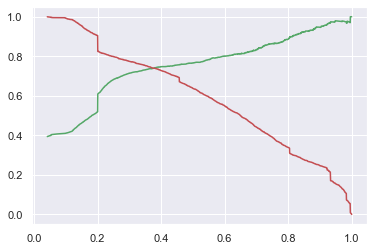

In [124]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [125]:
# Checking head of test data set
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3271,0,0,4.0,157,4.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1490,0,0,5.0,1513,5.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7936,0,0,2.0,74,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4216,0,0,0.0,0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3830,0,0,8.0,164,8.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [126]:
# Preparing test set
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3009,0,0,-0.431325,-0.160255,-0.179666,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1012,1,0,-0.431325,-0.540048,-0.179666,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
9226,0,0,-1.124566,-0.888650,-1.132538,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4750,0,0,-0.431325,1.643304,-0.179666,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
7987,0,0,0.608537,2.017593,0.058552,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [127]:
X_test = X_test[col7]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Specialization_Others,What is your current occupation_Working Professional
3271,0,-0.591008,0,0,0,0,1,0
1490,0,1.894051,1,0,0,0,0,1
7936,0,-0.743117,0,0,0,0,1,0
4216,0,-0.878732,0,1,0,0,0,0
3830,0,-0.578179,1,0,0,0,0,0


#### Making Prediction on Test Set

In [128]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.130369
1490    0.976394
7936    0.112494
4216    0.933109
3830    0.161102
1800    0.693593
6507    0.151766
4821    0.353717
4223    0.805789
4714    0.201978
dtype: float64

In [129]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [130]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [131]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [132]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [133]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.130369
1,1,1490,0.976394
2,0,7936,0.112494
3,1,4216,0.933109
4,0,3830,0.161102


In [134]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [135]:
y_pred_final['Final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.32 else 0)

In [136]:
# Calculate the lead score
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))

In [137]:
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob,Final_Predicted,Lead_Score
0,0,3271,0.130369,0,13
1,1,1490,0.976394,1,98
2,0,7936,0.112494,0,11
3,1,4216,0.933109,1,93
4,0,3830,0.161102,0,16


In [138]:
# Checking the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.7994858611825193

In [139]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted )
confusion2

array([[1422,  312],
       [ 234,  755]], dtype=int64)

In [140]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [141]:
# Checking see the sensitivity of our logistic regression model
print('Sensitivity :',TP / float(TP+FN))

# Checking calculate specificity
print('Specificity :',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('False postive rate :',FP/ float(TN+FP))

# Positive predictive value 
print ('Positive predictive value :',TP / float(TP+FP))

# Negative predictive value
print ('Negative predictive value :',TN / float(TN+ FN))

Sensitivity : 0.7633973710819009
Specificity : 0.8200692041522492
False postive rate : 0.17993079584775087
Positive predictive value : 0.7075913776944704
Negative predictive value : 0.8586956521739131


#### Checking  Precision and Recall for test set

In [142]:
# Precision TP / TP + FP
print('Precision :',confusion[1,1]/(confusion[0,1]+confusion[1,1]))
# Recall TP / TP + FN
print('Recall :',confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Precision : 0.7660933660933661
Recall : 0.6373671300081766


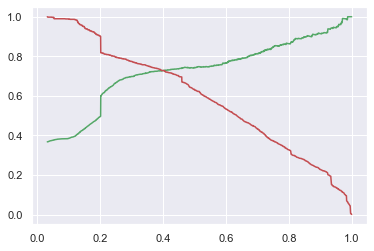

In [143]:
# ploting line graph to cross check the threshold.
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Final Conclusion :

<font color= blue> <h8>
    
Let us compare the values obtained for Train & Test:

    Train Data:

  - Accuracy    : 0.80%
  - Sensitivity : 0.77%
  - Specificity : 0.82%



    Test Data:

  - Accuracy    : 0.80%
  - Sensitivity : 0.77%
  - Specificity : 0.82%

- The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls
based on this model

- The metrics seem to hold on the test dataset as well. So, it looks like we have created a decent model for the Converted dataset as the metrics are decent for both the training and test datasets.
</h8></font>  